In [2]:
pip install pydub

In [50]:
from pydub import AudioSegment
from pydub.silence import detect_nonsilent

def create_json(audio_file):

  cnt = 0
  intervals_jsons = []

  min_silence_length = 1000
  intervals = detect_nonsilent(audio_file,
                               min_silence_len=min_silence_length,
                               silence_thresh=-16)
  if intervals[0][0] != 0:
    intervals_jsons.append({'start':0,'end':intervals[0][0]/1000,'tag':'pause'})
    cnt += 1

  non_silence_start = intervals[0][0]
  before_silence_start = intervals[0][1]

  for interval in intervals:
    interval_audio = audio_file[interval[0]:interval[1]]
    #1.5초 이상의 공백 부분 처리
    if (interval[0] - before_silence_start) >= 1500:
      intervals_jsons.append({'start':non_silence_start/1000,'end':(before_silence_start+150)/1000,'tag':'None'})
      non_silence_start = interval[0]-150
      intervals_jsons.append({'start':before_silence_start/1000,'end':interval[0]/1000,'tag':'puase'})
      cnt += 1
    before_silence_start = interval[1]

  if non_silence_start != len(audio_file):
    intervals_jsons.append({'start':non_silence_start/1000,'end':len(audio_file)/1000,'tag':'None'})

  return intervals_jsons,f'pause 개수 : {cnt}'


In [4]:
# 음성 소리 일정하게 맞추기
def match_target_amplitude(sound, target_dBFS) :
    change_in_dBFS = target_dBFS - sound.dBFS # sound.dBFS는 음성의 진폭을 가져옴
    return sound.apply_gain(change_in_dBFS)

In [52]:
sound = AudioSegment.from_file("/content/drive/MyDrive/프메/가상발표/audio_sumin_with_pause.wav", "wav")
normalized_sound = match_target_amplitude(sound, -20.0) #

json = create_json(normalized_sound)
for i in json :
    for j in i :
        if isinstance(j,dict) :
            print(j)
    print(i[-1])

{'start': 0, 'end': 4.83, 'tag': 'pause'}
{'start': 4.83, 'end': 19.605, 'tag': 'None'}
{'start': 4.83, 'end': 19.605, 'tag': 'None'}
1


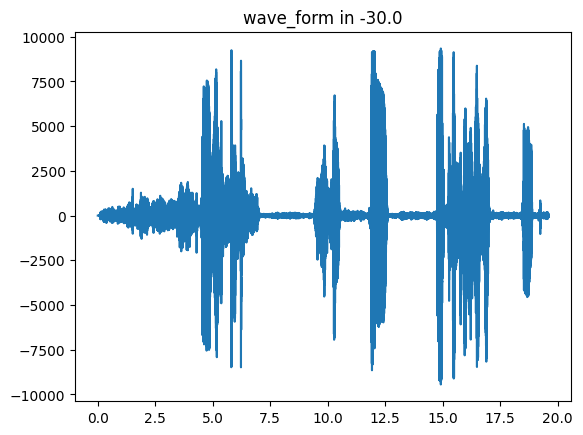

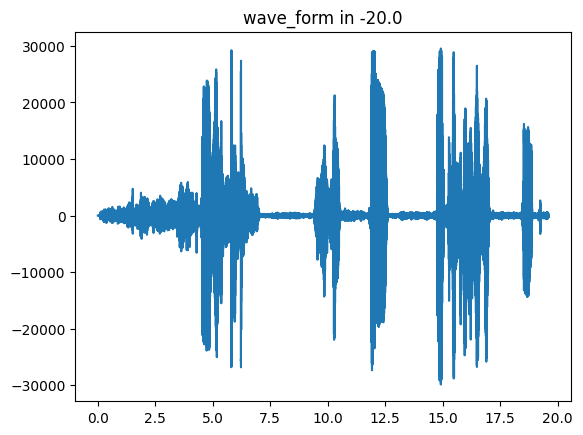

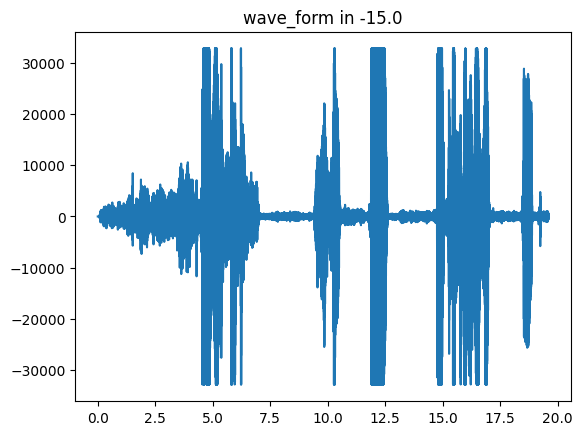

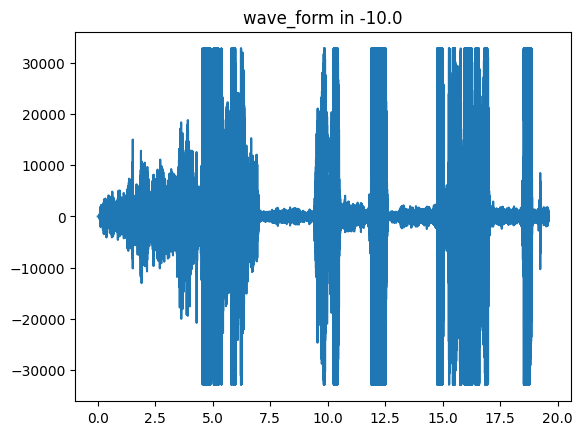

In [63]:
# 파형 확인
import matplotlib.pyplot as plt
import numpy as np

def plot_waveform(audio_file,target_dBFS) :
    sound = AudioSegment.from_file(audio_file)
    normalized_sound = match_target_amplitude(sound, target_dBFS) #
    samples = normalized_sound.get_array_of_samples()
    sample_rate = normalized_sound.frame_rate
    time = np.arange(0,len(samples))/sample_rate
    plt.plot(time,samples)
    plt.title(f'wave_form in {target_dBFS}')
    plt.show()
audio_file  ="/content/drive/MyDrive/프메/가상발표/audio_sumin_with_pause.wav"

plot_waveform(audio_file,-30.0)
plot_waveform(audio_file,-20.0)
plot_waveform(audio_file,-15.0)
plot_waveform(audio_file,-10.0)



In [ ]:
from pydub import AudioSegment
from pydub.silence import detect_nonsilent

min_silence_length = 70

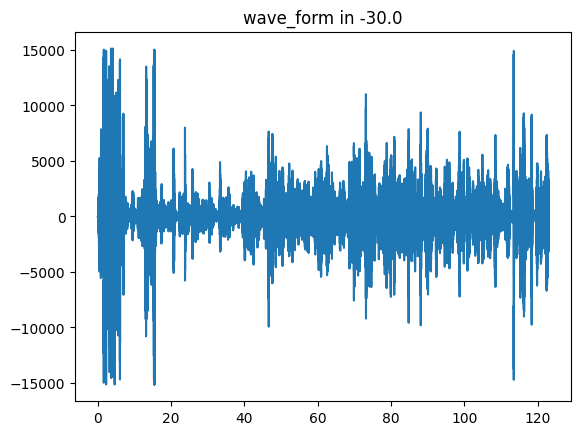

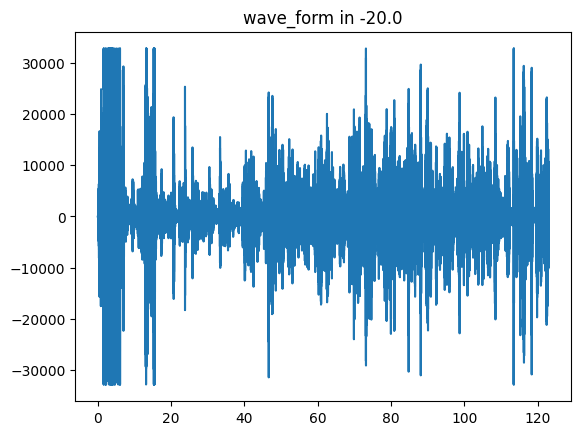

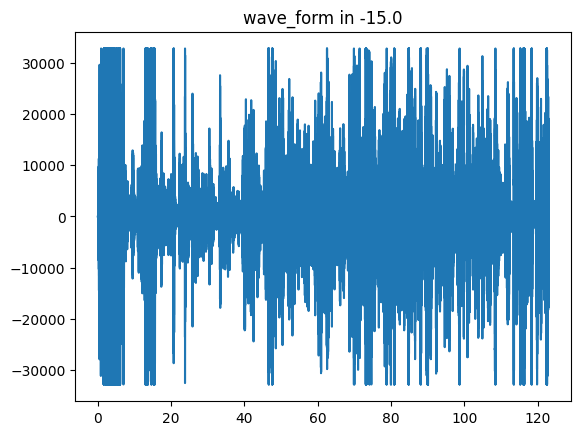

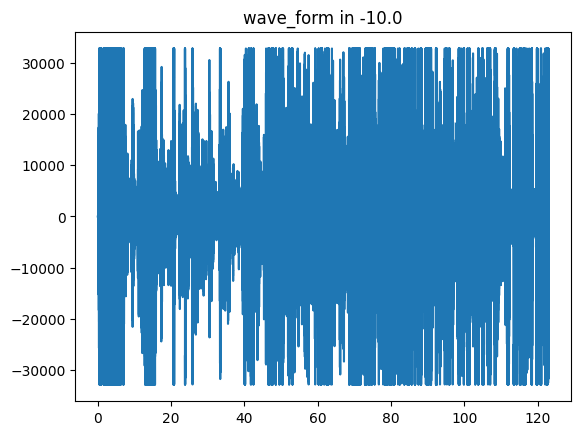

In [64]:
import matplotlib.pyplot as plt
import numpy as np

def plot_waveform(audio_file,target_dBFS) :
    sound = AudioSegment.from_file(audio_file)
    normalized_sound = match_target_amplitude(sound, target_dBFS) #
    samples = normalized_sound.get_array_of_samples()
    sample_rate = normalized_sound.frame_rate
    time = np.arange(0,len(samples))/sample_rate
    plt.plot(time,samples)
    plt.title(f'wave_form in {target_dBFS}')
    plt.show()

audio_file  = sound = "/content/drive/MyDrive/프메/가상발표/audio_sample.wav"
plot_waveform(audio_file,-30.0)
plot_waveform(audio_file,-20.0)
plot_waveform(audio_file,-15.0)
plot_waveform(audio_file,-10.0)



In [58]:
#쉽지 않음
from pydub import AudioSegment
from pydub.silence import split_on_silence

# 오디오 파일 로드
audio = AudioSegment.from_file("/content/drive/MyDrive/프메/가상발표/audio_sumin_with_pause.wav", format="wav")

# 노이즈 제거를 위해 오디오를 작은 조각으로 분리
chunks = split_on_silence(audio, min_silence_len=500, silence_thresh=-20)

# 각 조각을 하나의 오디오 파일로 변환
output = AudioSegment.empty()
for chunk in chunks:
    output += chunk

# 노이즈가 제거된 오디오 파일 저장
output.export("output4.wav", format="wav")


<_io.BufferedRandom name='output4.wav'>